In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Pallete colors
red  = '#BE3232'
blue = '#3A527B'

# **Probabilities**

## **Ordinary Probability**

**Classical Probability**

Consider the classic experiment of flipping a fair coin, which has two distinct and mutually exclusive outcomes: "heads" **or** "tails". The various factors influencing the outcome of the experiment are too numerous to take into account. Therefore the outcome of the experiment is said to be random, given our ignorance about all possible factors influencing the outcome. Everyone would certainly agree that the probability of getting heads and the probability of getting tails both equal $\frac{1}{2}$. Intuitively, this answer is based on the idea that two outcomes are equally likely or equiprobable, because of the coin’s symmetric design. 

When dealing with experiments that have a finite and defined number of mutually exclusive and equiprobable outcomes, such as our coin toss, we can specify an event, denoted as $A$, which represents a set of outcomes (e.g., the coin landing on 'heads'). The probability of event $A$ happening, $P(A)$, is then defined by the proportion of outcomes favorable to $A$ relative to the total number of possible outcomes:

$$P(A) = \frac{N(A)}{N}$$

where $N$ is the total number of outcomes of the experiment and $N(A)$ is the number of outcomes leading to the occurrence of the event $A$. This priori approach to probability is based on theoretical reasoning and logical deduction, rather than empirical evidence, and assumes all possible outcomes are known and equally likely. 

This approach is not the ideal one for data science, where often we cannot assume that all outcomes are known and equally likely. In real-world scenarios, we typically have to rely on observed data to estimate probabilities. This is where the frequentist interpretation of probability comes into play, which is based in the empirical analysis of events.

**Frequentist Probability**

In contrast to the classical interpretation, frequentist probability states that as an experiment is repeated a large number of times, it will exhibit a remarkable consistency in behavior, which allows us to assign a precise meaning to the concept of probability, not only in cases with equiprobable outcomes but also in the most general situations. Let $n$ be the total number of trials in the experiment, and let $n(A)$ be the number of trials in which $A$ occurs. Then the proportion

$$\frac{n(A)}{n}$$

is called the relative frequency of the event $A$ in the given series of trials. It turns out that the relative frequencies observed in different series of trials are approximately the same for a large $n$, clustering about some constant called the probability of the event A. More precisely, this means that

$$P(A) = \lim_{n \to \infty} \frac{n(A)}{n}$$

For equiprobable events, such as flipping a fair coin, the frequentist probability approaches the classical probability as the number of trials increases:

$$P(A) = \lim_{n \to \infty} \frac{n(A)}{n}  \sim \frac{N(A)}{N}$$

This relationship illustrates that under the condition of equiprobability, the empirical frequentist approach converges with the theoretical classical approach. To illustrate this, consider the following simulation of 2000 coin tosses trials to demonstrate this convergence.

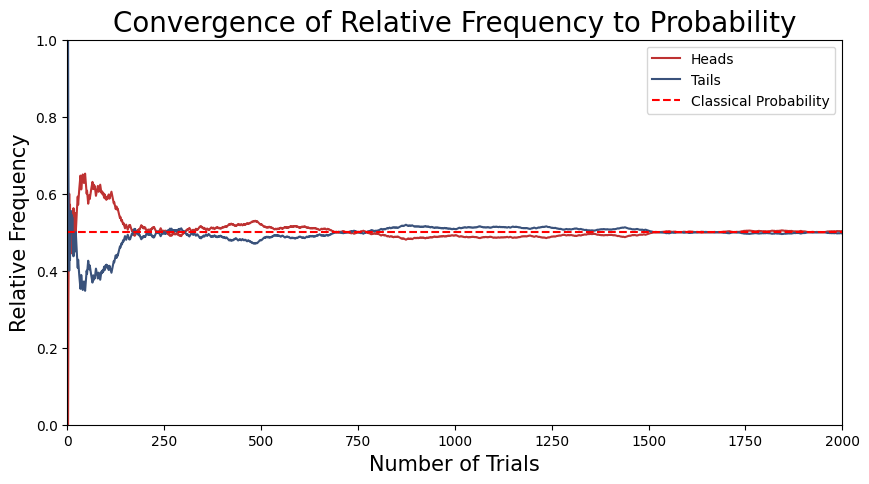

In [25]:
red  = '#BE3232'
blue = '#3A527B'
np.random.seed(46)

# Number of trials in the experiment
num_trials = 2000

# Simulate coin flips
flips = np.random.choice(['heads', 'tails'], size=num_trials)

# Calculate the relative frequencies
heads_cumulative = np.cumsum(flips == 'heads')
tails_cumulative = np.cumsum(flips == 'tails')
trials = np.arange(1, num_trials + 1)

# Frequencies for head and tails
freq_heads = heads_cumulative / trials
freq_tails = tails_cumulative / trials

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(trials, freq_heads, label='Heads', color=red)
plt.plot(trials, freq_tails, label='Tails', color=blue)
plt.axhline(0.5, color='red', linestyle='--', label='Classical Probability')
plt.xlabel('Number of Trials', fontsize = 15)
plt.ylabel('Relative Frequency', fontsize = 15)
plt.xlim(0, num_trials)
plt.ylim(0, 1)
plt.title('Convergence of Relative Frequency to Probability', fontsize=20)
plt.legend()
plt.grid(False)
plt.show()


**Exemple**

Let's explore the General Social Survey (GSS) dataset to determine the probability of randomly selecting a banking worker. In this dataset, the industry in which a respondent works is denoted by the `indus10` feature, with the code for "Banking and related activities" being 6870.

**Dataset Features**

- `caseid`: Unique identifier for each respondent.
- `year`: The year in which the respondent was surveyed.
- `age`: The age of the respondent at the time of the survey.
- `sex`: The sex of the respondent (male or female).
- `polviews`: The respondent's political views, scaled from liberal to conservative.
- `partyid`: The respondent's political party affiliation, categorized as Democratic, Republican, or Independent.
- `indus10`: Industry code representing the respondent's field of work.

To calculate the probability of randomly choosing a banking worker from this dataset, we would count the number of respondents whose `indus10` code is 6870 and divide that by the total number of respondents in the dataset. This can be expressed mathematically as:

$$ P(\text{Banker}) = \frac{N(\text{indus10} = 6870)}{N} $$


where $N(\text{indus10} = 6870)$ is the number of banking workers in the dataset and $N$ is the total number of respondents in the dataset.

In [26]:
# General Social Survey data
gss = pd.read_csv('data/gss.csv')
gss

,caseid,year,age,sex,polviews,partyid,indus10
0,1,1974,21.0,1,4.0,2.0,4970.0
1,2,1974,41.0,1,5.0,0.0,9160.0
2,5,1974,58.0,2,6.0,1.0,2670.0
3,6,1974,30.0,1,5.0,4.0,6870.0
4,7,1974,48.0,1,5.0,4.0,7860.0
...,...,...,...,...,...,...,...
49285,2863,2016,57.0,2,1.0,0.0,7490.0
49286,2864,2016,77.0,1,6.0,7.0,3590.0
49287,2865,2016,87.0,2,4.0,5.0,770.0
49288,2866,2016,55.0,2,5.0,5.0,8680.0


In [27]:
# Define the ordinary probability
def prob(event):
    """Calculate the probability of an event."""
    N = len(event)
    return event.sum() / N

In [28]:
# Banking and related activities
banker = (gss['indus10'] == 6870)

print("P(banker) = ", prob(banker))

P(banker) =  0.014769730168391155


We can see that about $1.5\%$ of the respondents work in banking, so if we choose a random person from the dataset, the probability they are a banker is about $1.5\%$.

## **Joint Probability**

Joint probability is the probability of two or more events happening at the same time. For two events, $A$ and $B$, the joint probability is mathematically represented as:

$$
P(A \cap B) = P(A \text{ and } B)
$$

In practical terms, it answers questions such as: "What is the probability that event $A$ happen while event $B$ also happens?" We can think of this in terms of sets, where both events $A$ and $B$ are considered a set of outcomes for a given experiment. The intersection set $A \cap B$ represents the outcomes where both events $A$ and $B$ happens simultaneously.

  <center><img src = "figures/venn-diagram-intersection.png" width="500" height="300"/></center>

In this illustration, $\Omega$ is known as the sample space of all possible outcomes from the experiment. As subsets of the sample space $\Omega$, we have the sets of outcomes leading to events $A$ and $B$, and their intersection when both events happen in the same trial for this experiment.

Let's consider an experiment with an equiprobable and finite number of outcomes. Let $N$ denote the total number of trials in the experiment. Suppose $N(A)$ and $N(B)$ represent the number of trials where events $A$ and $B$ happen, respectively, and $N(A \cap B)$ represents the number of trials that both events $A$ and $B$ happen together ( intersection set). In this scenario, the joint probability can be expressed as:

$$
P(A \cap B) = \frac{N(A \cap B)}{N}
$$

If we are considering more than two events, say $A$, $B$, and $C$, the joint probability can be generalized further as:

$$
P(A \cap B \cap C) = P(A \text{ and } B \text{ and } C)
$$

This concept is extendable to any number of events, providing a robust tool to evaluate the probability of several interconnected events happening simultaneously.

When the events are mutually exclusive, meaning that they cannot happen together in the same trial, the joint probability is zero 

  <center><img src = "figures/venn-diagram-null.png" width="500" height="300"/></center>


In this case, as illustrated, the sets for events $A$ and $B$ have an empty intersection set $A \cap B = \emptyset$, hence the joint probability must be zero:

$$
P(A \cap B) = 0
$$


**Example**

Let's explore the the probability of selecting a respondent who is both a banker and a Democrat from the General Social Survey (GSS) dataset. Here, the occupation of the respondent is encoded in the `indus10` feature, where the code for "Banking and related activities" 6870. Similarly, the `partyid` feature encodes the political affiliation of the respondent, with codes ranging from 0 to 7.

`partyid`

- 0 Strong democrat
- 1 Not strong democrat
- 2 Independent, near democrat
- 3 Independent
- 4 Independent, near republican
- 5 Not strong republican
- 6 Strong republican
- 7 Other party

To calculate the probability of randomly selecting a respondent who is a banker and also identifies as a Democrat (strong or not strong), we would identify the intersection set of respondents whose `indus10` code indicates they are bankers and whose `partyid` is either 0 or 1. This gives the joint probability of this two events happen simultaneously:

$$ P(\text{Banker and Democrat}) = \frac{N\bigg((\text{indus10} = 6870) \cap (\text{partyid} \leq 1)\bigg)}{N} $$

In [29]:
# Banking and related activities
banker = (gss['indus10'] == 6870)

# Banking and related activities
democrat = (gss['partyid'] <= 1)

print("P(democrat and banker) =", prob(banker & democrat))

P(democrat and banker) = 0.004686548995739501


The data reveals that $P(\text{Banker and Democrat}) = 0.0047 $ (or 0.47%) and $P(\text{Banker}) = 0.015 $ (or 1.5%), it confirms that the subset of bankers who are Democrats is less than the overall proportion of bankers in the dataset, as not all bankers are Democrats.

## **Conditional Probability**

Conditional probability helps us understand the relationship between two events, $A$ and $B$. In particular, it describes the probability of event $A$ given that event $B$ has already happened. The conditional probability of event $A$ given event $B$ is defined as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}.$$

Here, $P(A \cap B)$ represents the joint probability, which means the chance of two events happening simultaneously (or at same trial in a experiment). Suppose we conduct a random experiment with a equiprobable and finite number of outcomes. Let $N$ represent the total number of trials, $N(B)$ be the number of trials resulting in event $B$, and $N(A \cap B)$ be the number of trials where both $A$ and $B$ happen together. In this case, the probability of $B$ and the joint probability $A \cap B$ can be expressed as:

$$P(B) = \frac{N(B)}{N}, ~~~~~~P(A \cap B) = \frac{N(A \cap B)}{N},$$

Using these expressions, we can rewrite the conditional probability of $A$ given $B$ as:

$$P(A|B) = \frac{N(A \cap B)}{N(B)}.$$

This equation essentially calculates the proportion of trials where both $A$ and $B$ happen (joint probability) out of the trials where event $B$ occurs.

When the event $A$ implies in $B$ ($B$ is subset of $A$: $B \subset A$ ), meaning that the events always happen together in the same trial, the conditional probability is one

<center><img src = "figures/venn-diagram-subset.png" width="500" height="300"/></center>

In this case, as illustrated, the set $B$ is subset of $A$, which implies a $100\%$ chance of event $A$ happening given that event $B$ happen:

$$P(A|B) = 1$$ 

**Example**

Let's examine the probability of selecting a respondent who is a Democrat, given their political views are liberal. In the GSS dataset, respondents' political views are classified under the `polviews` feature, with the codes for being liberal as

`polviews` 

- 1 Extremely liberal
- 2 Liberal
- 3 Slightly liberal

and for democrats as


`partyid`

- 0 Strong democrat
- 1 Not strong democrat
- 2 Independent, near democrat

To compute the conditional probability of a respondent being a Democrat given that they are liberal is given by

$$ P(\text{Democrat} | \text{Liberal}) = \frac{N\bigg((\text{polviews} = 2) \cap (\text{partyid} \leq 1)\bigg)}{N(\text{polviews} = 2)} $$

where $N(\text{polviews} = 2) \cap (\text{partyid} \leq 1)$ is the number of respondents who are both liberal and Democrat, and $N(\text{polviews} = 2)$ is the total number of liberal respondents in the dataset.

In [30]:
# Propositions
# set of liberal respondents
liberal = (gss['polviews'] <= 3)
# set of bankers by industry code
banker = (gss['indus10'] == 6870)
# set of Democrats and strong Democrats
democrat = (gss['partyid'] <= 2)

# subset that includes only the respondents who are both liberal and Democrats
liberal_democrats = democrat[liberal]
liberal_democrats

8         True
17        True
18       False
24        True
28       False
         ...  
49267     True
49271     True
49278     True
49279     True
49285     True
Name: partyid, Length: 13493, dtype: bool

This essentially gives the intersection of the two sets, yielding a data series of booleans that are True only where someone is both liberal and a democrat and False otherwise.

In [31]:
# Define the conditional probability
def conditional(event, given):
    """
    Calculate the conditional probability of an event given a condition.
    The function prob() is used to compute the probability, where prob is previously defined to calculate
    the probability of the occurrence of an event.
    """

    # Probability of Sample space to only instances where the given condition is true
    return prob(event[given])

# Method 1: Using subset of liberal and Democrats to restrict sample space.
print("p(liberal|democrat) = ", prob(liberal_democrats))

# Method 2: Using explicit Boolean conditions to restrict sample space.
print("p(liberal|democrat) = ", prob(liberal & democrat) / prob(liberal))

# Method 3: Using subset of liberal and Democrats calculated inside the function by the given condition.
print("p(liberal|democrat) = ", conditional(democrat, given = liberal))


p(liberal|democrat) =  0.7046616764248128
p(liberal|democrat) =  0.7046616764248128
p(liberal|democrat) =  0.7046616764248128


As we can observe, **ordinary probability** considers the probability of an event happening over the entire sample space $\Omega$ ( entire set of possible outcomes). On the other hand, **conditional probability** restricts this context by considering the probability of an event under a specific condition or set of conditions. It refines our expectations about an event by taking into account additional information that restricts the sample space $\Omega$ to a small region — the "given" condition.

This approach can be extended to account for multiple conditions simultaneously. This chain of conditions leads to scenarios where various factors intersect, allowing for more complex probability questions. It's the mathematical equivalent of saying, "Given this and that, what are the probabilities of something else happening?"

For example, what is the probability of selecting a Democrat given that he is a Liberal and a Banker? Or, what is the probability of selecting a Liberal given that he is a Banker and a Democrat?


In [32]:
# conditional probability of being a democrat given being liberal and a banker
print("p(Democrat|Liberal and Banker) = ", conditional(democrat, given=liberal & banker))

# conditional probability of being liberal and a banker given being a democrat
print("p(Liberal and Banker|Democrat) = ", conditional(liberal & banker, given=democrat))

p(Democrat|Liberal and Banker) =  0.6441717791411042
p(Liberal and Banker|Democrat) =  0.004333470903838217


## **Addition Law for Probability**

Consider two mutually exclusive events $A_1$ and $A_2$ associated with the outcomes of a random experiment, and let $A = A_1 \bigcup A_2$ be the union of the two events. If events $A_1$ and $A_2$ are mutually exclusive, by definition, they cannot happen simultaneously. This implies that the intersection of these two events must be $A_1 \bigcap A_2 = \emptyset$. If $A$ happen in a trial, it means that either event $A_1$ has happened, or event $A_2$ has happened, but not both since $A_1$ and $A_2$ are mutually exclusive. We can see this in the following figure for the sets $A_1$ and $A_2$:

<center><img src = "figures/venn-diagram-null-mutually-exclusive.png" width="500" height="300"/></center>

The union of the events $A_1 \bigcup A_2$ includes all the outcomes of both events, without any overlap. So, when counting the number of outcomes in $A$, we are essentially counting the number of outcomes in $A_1$ and $A_2$ separately and then adding them together. Therefore, we can write:

$$
\frac{N(A)}{N} = \frac{N(A_1)}{N} + \frac{N(A_2)}{N}
$$

where $N$ is the total number of trials in the experiment, and $N(A)$, $N(A_1)$, $N(A_2)$ are the total number of trials leading to events $A$, $A_1$, and $A_2$, respectively.

For a sufficiently large number of trials $N$, the relative frequencies $\frac{N(A)}{N}$, $\frac{N(A_1)}{N}$, $\frac{N(A_2)}{N}$ will coincide with the corresponding probabilities $P(A)$, $P(A_1)$, $P(A_2)$. We get:

$$
P(A) = P(A_1) + P(A_2)
$$

Similarly, if events $A_1$, $A_2$, and $A_3$ are mutually exclusive, it means that no two of these events can happen simultaneously. This implies that their pairwise intersections are empty: $A_1 \bigcap A_2 = \emptyset$, $A_2 \bigcap A_3 = \emptyset$, and $A_1 \bigcap A_3 = \emptyset$. As a result, the union of events $A_1$ and $A_2$ is also mutually exclusive with $A_3$. For the probability, this can be expressed as:

$$
P(A_1 \bigcup A_2 \bigcup A_3) = P(A_1 \bigcup A_2) + P(A_3)
$$

Since $A_1$ and $A_2$ are mutually exclusive, we get:

$$
P(A_1 \bigcup A_2 \bigcup A_3) =  P(A_1) + P(A_2) + P(A_3)
$$

More generally, given $N$ mutually exclusive events $A_1$, $A_2$, $\cdots$, $A_n$, we have the formula:

$$
P(\bigcup_{k=1}^{n}A_{k}) = \sum_{k=1}^{n} P(A_{k}) 
$$

**Example**

We are interested in finding the probability that a randomly selected respondent is **either a liberal Democrat or a conservative Republican**. To do this, we will identify and use two mutually exclusive events based on the respondents' political party affiliations (`partyid`) and views (`polviews`).

for the liberal and conservative party affiliations the code are :

`partyid`

- 1 Extremely liberal
- 2 Liberal
- 3 Slightly liberal
- 5 Slightly conservative
- 6 Conservative
- 7 Extremely conservative

For the political view of democrat and republican we have:

`polviews`

- 0 Strong democrat
- 1 Not strong democrat
- 2 Independent, near democrat
- 4 Independent, near republican
- 5 Not strong republican
- 6 Strong republican





In [33]:
# Political view
liberal = (gss['polviews'] <= 3)
conservative = (gss['polviews'] >= 5)

# Party affiliations
democrat = (gss['partyid'] <= 1)
republican = (gss['partyid'] >= 4)

# Intersections of partyid and polviews
liberal_democrat = liberal & democrat
conservative_republican = conservative & republican

# Intersection of mutually exclusive set of events --> Empty set
empty_set = (liberal_democrat & conservative_republican).sum()
print( "liberal democrat & conservative republican = ", empty_set)

liberal democrat & conservative republican =  0


The probability of randomly selecting either a liberal democrat or a conservative republican is given by:

In [34]:
# Total probability of either a liberal democrat or a conservative republican
p = prob(liberal_democrat) + prob(conservative_republican)
print('Total Probability =', p)

Total Probability = 0.3445120714140799


### **Addition Law for Conditional Probability**

If $A_1, \cdots, A_n$ are mutually exclusive events, with union $A = \bigcup_{k=1}^{n}A_{k}$, then the addition law for conditional probability is
  $P(A|B) = \sum_{k=1}^{n} P(A_k|B)$.

**Proof**:
  
Given that $A_1, \cdots, A_n$ are mutually exclusive, we have:

$$A \cap B = \bigcup_{k=1}^{n}(A_{k}\cap B)$$

This represents the union of each intersection of $A_k \cap B$ for each $k = 1,2,...n$. By the addition law:

$$P(\bigcup_{k=1}^{n}(A_{k}\cap B)) = \sum_{k=1}^{n} P(A_{k}\cap B)$$

Dividing by $P(B)$, we get:

$$\frac{P(\bigcup_{k=1}^{n}(A_{k}\cap B))}{P(B)} = \sum_{k=1}^{n} \frac{P(A_{k}\cap B)}{P(B)}$$

Thus,

$$P(A|B) = \sum_{k=1}^{n} P(A_k|B) ~~ \square$$

**Example**

Respondents were asked about their age and their political party affiliation. Let's focus on two age groups: those younger than 30 years old, and those between 30 and 40 years old. What is the probability that a respondent falls into one of two age categories, given that they identify as a Democrat?


Here, the union of two mutually exclusive events $A_1$ and $A_2$ to create a new event that we can call "age group". This "age group" event $A$ encompasses all the possible outcomes for a respondent's age being less than 30 or between 30 and 40, and it can be formally defined as

$$
A = A_1 \cup A_2
$$

where
- $A_1$: The event where the respondent is younger than 30 years old
- $A_2$: The event where the respondent is between 30 and 40 years old

using the addition law for conditional probability, where $B$ is the event that the respondent identifies as a Democrat we can get the following result:

In [35]:
# Define mutually exclusive age groups
less_30 = (gss['age'] < 30)
between_30_40 = (gss['age'] >= 30) & (gss['age'] <= 40)

# Define Democrats set
democrat = (gss['partyid'] <= 1) 

# Mutually exclusive events
print("Age groups set are mutually exclusive = {} \n".format( (less_30 & between_30_40).sum()) )

# Calculate conditional probabilities
p_age_group_given_democrat = conditional(less_30, given=democrat) + conditional(between_30_40, given=democrat)

print("P(Age Group | Democrat) = ", p_age_group_given_democrat)

Age groups set are mutually exclusive = 0 

P(Age Group | Democrat) =  0.39638841189829943


## **Law of Total Probability**

Suppose we have a complete set of mutually exclusive and exhaustive events $B_1, \cdots, B_n$, meaning only one of these events can happen at a time, and their union covers the entire sample space. We can find the ordinary probability of event $A$ happening using the total probability formula:

$$P(A) = \sum_k P(A|B_k)P(B_k)$$

As we see before Mutually exclusive events are events that cannot happen simultaneously. On the other hand, exhaustive events are events that, when considered their union, cover the entire sample space $\Omega$. When a set of events is both mutually exclusive and exhaustive, it means that they cover all possible outcomes without overlapping.

To better understand mutually exclusive and exhaustive events, consider the example of rolling a fair six-sided die. The sample space for this experiment is the set of outcomes $\{1, 2, 3, 4, 5, 6\}$. We can define the events as follows:

- Event $B_1$: The die shows an odd number (outcomes: $\{1, 3, 5\}$)
- Event $B_2$: The die shows an even number (outcomes: $\{2, 4, 6\}$)

The events $B_1$ and $B_2$ are mutually exclusive, because no outcome can be both odd and even simultaneously. Furthermore, these events are exhaustive, because together they cover the entire sample space.

**Proof:**

Consider $\Omega$ as the sample space. If $B_1, \cdots, B_n$ are all the possible mutually exclusive and exhaustive events. If their union covers the entire sample space, then:

$$\bigcup_k B_k= \Omega$$

Consequently, event $A$ can be expressed as the union of its intersections with each of the mutually exclusive events $B_k$:

$$A = \bigcup_k (A \cap B_k)$$

Since the events $A \cap B_k$ are mutually exclusive, we can apply the addition rule of probability:

$$P(A) = P(\bigcup_k (A \cap B_k)) = \sum_k P(A \cap B_k)$$

Now we can rewrite the probability of the intersection using conditional probability:

$$P(A) = \sum_k P(A \cap B_k) = \sum_k P(A |B_k)P(B_k)~~~~ \square$$


This proof demonstrates how we can find the probability of an event $A$ happening by considering its relationship with a set of mutually exclusive and exhaustive events $B_1, \cdots, B_n$.

**Example**

Let's compute the probability that a respondent is a banker using the law of total probability.

Using the ordinary probability, we have:

$$P(\text{banker}) = \frac{N(\text{banker})}{N}$$

In [36]:
# Define 'banker' as respondents with the industry code for banking
banker = (gss['indus10'] == 6870)
print("P(banker) = ", prob(banker))

P(banker) =  0.014769730168391155


To apply the law of total probability, we need a mutually exclusive and exhaustive set that partitions the sample space. In this dataset, the categories of 'male' and 'female' serve as such a partition:

$$P(\text{banker}) = P(\text{banker}|\text{male})P(\text{male}) + P(\text{banker}|\text{female})P(\text{female}) $$

In [37]:
# Define 'male' and 'female' sets
male = (gss['sex'] == 1)
female = (gss['sex'] == 2)

# Calculate conditional probabilities
p = conditional(banker, given=male) * prob(male) + conditional(banker, given=female) * prob(female)
print("P(banker) = ", p)

P(banker) =  0.014769730168391153


We can subdivide the sample space further by considering the `polviews` feature, which categorizes respondents' political views. Since `polviews` contains seven distinct categories, each mutually exclusive and collectively exhaustive, we can use them to compute the total probability:

$$P(\text{banker}) = \sum^{7}_{i=1} P(\text{banker}|\text{polviews} = i)P(\text{polviews} = i)$$



In [38]:
# Compute the total probability across political views
p = sum(prob(gss['polviews'] == i) * conditional(banker, given=(gss['polviews'] == i)) for i in range(1, 8))
print("\n P(banker) = ", p)


 P(banker) =  0.014769730168391157


This shows how we can partition the sample space $\Omega$ using polviews, ensuring that all possible outcomes are considered when computing the total probability.

# **Bayes's Theorem**

Given two events A and B, Bayes' theorem relates the conditional probability of A given B ($P(A|B)$) to the conditional probability of B given A ($P(B|A)$), along with the individual probabilities of A ($P(A)$) and B ($P(B)$):

​$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{P(B|A) \cdot P(A)}{\sum_k P(B|A_k)P(A_k)} $$

where:

- $P(A|B)$: is the **posterior probability**. It represents the probability of event A happening, given that event B has happened. This is what we're trying to find using Bayes' theorem. It reflects our updated belief about event A after taking into account the new information provided by event B.

- $P(B|A)$: is the **likelihood**. It represents the probability of event B happening, given that event A has happened. This is often a known value or can be estimated from available data. It tells us how likely it is to observe event B when event A is true.

- $P(A)$: is the **prior probability**. It represents the probability of event A happening before taking into account any new information from event B. This is our initial belief about event A and can be based on previous data, expert opinion, or assumptions.

- $P(B)$: is the **total probability or evidence**. It represents the overall probability of event B happening, regardless of whether event A happens or not. This value can be calculated using the **law of total probability**, which takes into account both the probabilities of B happening when A happens and when A doesn't happen. Specifically, if we have a finite set of mutually exclusive and exhaustive events $A_1, \cdots, A_n$, then the probability of event B can be expressed as:
  $$P(B) = \sum_k P(B|A_k)P(A_k)$$
  - **Mutually exclusive:** The events $A_k$ do not happen simultaneously. For any pair of events $A_i$ and $A_j$, if $i \neq j$, then $P(A_i \cap A_j) = 0$.
  - **Exhaustive:** The union of all events $A_k$ covers the entire sample space, meaning that at least one of the events $A_k$ must happen. Mathematically, $\bigcup_k A_k = \Omega$, where $\Omega$ is the sample space.

$\textbf{proof}:$

For event A given event B, the conditional probability is defined as:

$$P(A|B) = \frac{P(A \bigcap B)}{P(B)}$$

Likewise, the conditional probability of event B given event A is expressed as:
$$P(B|A) = \frac{P(A \bigcap B)}{P(A)}$$

Our objective is to derive Bayes' theorem, which connects $P(A|B)$ and $P(B|A)$. To achieve this, we first isolate $P(A \cap B)$ in the second equation::
$$P(A \bigcap B) = P(B|A) \cdot P(A)$$

Next, substitute this expression for $P(A \cap B)$ into the first equation:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}~~~~\square$$

## **Interpretations of Bayes's Theorem**

**Bayes's Rule as Cause and Effect**

At the core of Bayes' rule is the capability to invert conditional probabilities. Suppose we know the probability of an effect given a cause, $P(B|A)$, and we're curious about the probability of the cause given the effect, $P(A|B)$. Bayes' theorem enables this inversion, effectively allowing us to transition between the probabilities of cause and effect.

**Bayes's Rule to update Beliefs ( Bayesian update)**

Beyond inverting conditional probabilities, Bayes' theorem also can be used as a way of updating beliefs with new data. Here, the key is the notion of the "prior" and the "posterior". The prior belief, $P(H)$, represents what initially we think about the hypothesis $H$. As new data $D$ becomes available, we update this belief to get a posterior belief, $P(H|D)$. In this context, the theorem is formulated as:


$$ P(H|D) = \frac{P(H)P(D|H)}{P(D)} $$

Each term in this equation is defined as follows:
- $ P(H) $: The prior probability of the hypothesis before observing the data.
- $ P(H|D) $: The posterior probability of the hypothesis after observing the data.
- $ P(D|H) $: The likelihood of observing the data under the hypothesis.
- $ P(D) $: The total probability of observing the data under any hypothesis.

Calculating the total probability of the data, $ P(D) $, can be challenging since it represents the probability of the data under all possible hypotheses. To accurately apply the law of total probability, we must use a set of hypotheses that are mutually exclusive and collectively exhaustive:
- Mutually exclusive: only one hypothesis can be true.
- Collectively exhaustive: at least one of the hypotheses must be true.

Under these conditions, we can compute $ P(D) $ using the law of total probability. For two hypotheses, $ H_1 $ and $ H_2 $, this is calculated as:

$$ P(D) = P(H_1)P(D|H_1) + P(H_2)P(D|H_2) $$

For any number of hypotheses, the formula generalizes to:

$$ P(D) = \sum_i P(H_i)P(D|H_i) $$

## **Bayes's Applications**
### **Urn problem**

Imagine a scenario involving two urns, each containing a mixture of blue and red balls:

- Urn 1 contains 30 blue balls and 10 red balls.
- Urn 2 contains 20 blue balls and 20 red balls.

Now suppose we choose one of the urns at random and, without looking, choose a ball at random. If the ball is blue, what is the probability that it came from urn 1?



**bayes's as cause-and-effect**

To solve this problem, we can employ a cause-and-effect framework of bayes theorem. More specifically, our goal is to determine the probability that Urn 1 was the chosen urn, given that a blue ball was selected:

$$P(\text{urn 1}|\text{blue})$$

However, the information provided only gives us the reverse probabilities: the likelihood of drawing a blue ball given that we chose from Urn 1 or Urn 2:

$$P(\text{blue}|\text{urn 1})$$

$$P(\text{blue}|\text{urn 2})$$

With these probabilities, we can employ Bayes' theorem to compute the desired probability as follows:

$$P(\text{urn 1}|\text{blue}) =  \frac{P(\text{blue}|\text{urn 1})P(\text{urn 1})}{P(\text{blue})}$$

To calculate the total probability, $P(\text{Blue})$, of selecting a blue ball, we employ the law of total probability. This law allows us to partition the sample space into distinct subsets, selecting from Urn 1 and Urn 2—and compute the overall probability by summing the probabilities of each case:

$$P(\text{blue}) = P(\text{blue}|\text{urn 1})P(\text{urn 1}) + P(\text{blue}|\text{urn 2})P(\text{urn 2})$$

In this context, it's important to note that the conditions of mutually exclusive and exhaustive sets are satisfied. The events are mutually exclusive because a ball can only be selected from one urn at a time, and they are exhaustive because there are no other urns from which the ball could be selected.

In [39]:
# Blue:0 and Red:1
data = {
    'urn': [1, 1, 2, 2],
    'color': [0, 1, 0, 1],
    'count': [30, 10, 20, 20]
}

df = pd.DataFrame(data)
df

,urn,color,count
0,1,0,30
1,1,1,10
2,2,0,20
3,2,1,20


In [40]:
blue = df['color'] == 0
urn1 = df['urn'] == 1
urn2 = df['urn'] == 2

# Number of blue balls in urn 1 and urn 2
N_blue_urn1 = df[blue & urn1]['count'].sum()
N_blue_urn2 = df[blue & urn2]['count'].sum()
# Total number of blue balls
N_blue = df[blue]['count'].sum() 

N_urn1 = df[urn1]['count'].sum()
N_urn2 = df[urn2]['count'].sum()

# Conditional probabilities of getting a blue ball given the urn
P_blue_urn1 = N_blue_urn1/N_urn1
P_blue_urn2 = N_blue_urn2/N_urn2
print("P(blue|urn1) = ", P_blue_urn1)
print("P(blue|urn2) = ", P_blue_urn2)

# Prior probabilities for each urn
P_urn1 = P_urn2 = 1/2

# Total probability of getting a blue ball
P_blue = P_blue_urn1*P_urn1 + P_blue_urn2*P_urn2
print("P(blue) = ", P_blue)

# Bayes' rule
p_urn1_blue = P_blue_urn1*P_urn1 / P_blue
print("P(urn1|blue) = ", p_urn1_blue)

P(blue|urn1) =  0.75
P(blue|urn2) =  0.5
P(blue) =  0.625
P(urn1|blue) =  0.6


**Bayesian update**

To solve this problem, we can employ a cause-and-effect framework of bayes theorem

We can employ know the Bayesian update framework for this same problem. In this case, we apply the Bayesian update framework to get access to our belief about which urn the blue ball came from, after observing that the selected ball is indeed blue.

To begin with, we have our prior beliefs, represented by the prior probabilities $P(\text{urn 1})$ and $P(\text{urn 2})$, which, in the absence of any additional information, are both $1/2$, reflecting an equal chance of choosing either urn.

A convenient tool for doing a Bayesian update is a Bayes table:

In [41]:
table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

#  P(urn1) and P(urn2)
table['prior'] = 1/2, 1/2

# P(urn1|blue) and P(urn2|blue)
table['likelihood'] = 0.75, 0.5
table

,prior,likelihood
Bowl 1,0.5,0.75
Bowl 2,0.5,0.50


The likelihood are not required to sum to 1, **as they are not mutually exclusive and exhaustive events**. Each likelihood is calculated independently for each urn, based on the composition of balls within that specific urn. Now we multiply the priors by the likelihoods:

In [42]:
table['unnormalized_posterior'] = table['prior'] * table['likelihood']
table

,prior,likelihood,unnormalized_posterior
Bowl 1,0.5,0.75,0.375
Bowl 2,0.5,0.50,0.250


For normalizing the posterior probabilities, we have a couple of alternatives. We could compute the total probability $P(D)$ as before, or directly sum the unnormalized posterior probabilities and divide each by this sum, ensuring a valid probability distribution for the updated beliefs. This process is called “normalization”, which is why the total probability of the data is also called the “normalizing constant”.

In [43]:
P_data = table['unnormalized_posterior'].sum()
table['posterior'] = table['unnormalized_posterior'] / P_data
table

,prior,likelihood,unnormalized_posterior,posterior
Bowl 1,0.5,0.75,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.4


We find that the posterior probability for Urn 1 is 0.6. This aligns with the result derived explicitly using Bayes’s theorem. Additionally, we also find the posterior probability for Urn 2 , which is 0.4.